# CESM LENS on AWS

This notebook demonstrates how to access the CESM-LENS stored in AWS S3. The bucket for this data is a `Requester Pays bucket`. 
With Requester Pays buckets, the requester instead of the bucket owner pays the cost of the request and the data download from the bucket. The bucket owner always pays the cost of storing data.

For accessing this data, the user needs to authenticate. We recommend creating a [named profile](https://docs.aws.amazon.com/cli/latest/userguide/cli-configure-profiles.html) with AWS CLI and using this named profile for authentication.
As an example, let's create a named profile from the command line by running:

```bash
aws configure --profile bob
```

For demonstration purposes, we named our profile `bob`. Feel free to name it differently. Once the named profile is created, proceed to the next step. 

In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import intake

## Building The Collection Catalog

In [2]:
col = intake.open_esm_metadatastore(collection_name="AWS-CESM1-LE", 
                                    storage_options={'profile_name': 'bob'})

Getting file listing: land:monthly:aws-s3:s3://ncar-cesm-lens/lnd/monthly



Getting file listing: land:daily:aws-s3:s3://ncar-cesm-lens/lnd/daily



Getting file listing: ocean:monthly:aws-s3:s3://ncar-cesm-lens/ocn/monthly



Getting file listing: atm:monthly:aws-s3:s3://ncar-cesm-lens/atm/monthly



Getting file listing: atm:daily:aws-s3:s3://ncar-cesm-lens/atm/daily



Getting file listing: atm:hourly6-1990-2005:aws-s3:s3://ncar-cesm-lens/atm/hourly6-1990-2005



Getting file listing: atm:hourly6-2026-2035:aws-s3:s3://ncar-cesm-lens/atm/hourly6-2026-2035



Getting file listing: atm:hourly6-2071-2080:aws-s3:s3://ncar-cesm-lens/atm/hourly6-2071-2080



Getting file listing: ice_nh:monthly:aws-s3:s3://ncar-cesm-lens/ice_nh/monthly



Getting file listing: ice_nh:daily:aws-s3:s3://ncar-cesm-lens/ice_nh/daily



Getting file listing: ice_sh:monthly:aws-s3:s3://ncar-cesm-lens/ice_sh/monthly



Getting file listing: ice_sh:daily:aws-s3:s3://ncar-cesm-lens/ice_sh/daily



Persisting AWS-CESM1-LE at : /home/jovyan/.intake_esm/collections/AWS-CESM1-LE.nc


In [3]:
col

AWS-CESM1-LE collection catalogue with 254 entries:
	> 12 resource(s)

	> 1 resource_type(s)

	> 1 direct_access(s)

	> 5 experiment(s)

	> 5 frequency(s)

	> 5 component(s)

	> 46 variable(s)

	> 254 store_fullpath(s)

	> 1 store_bucketname(s)

In [4]:
col.unique(columns=['variable', 'experiment', 'frequency', 'component'])

{'variable': {'count': 46,
  'values': ['FSNO',
   'H2OSNO',
   'QRUNOFF',
   'RAIN',
   'SNOW',
   'SOILLIQ',
   'SOILWATER_10CM',
   'SALT',
   'SSH',
   'SST',
   'FLNS',
   'FLNSC',
   'FLUT',
   'FSNS',
   'FSNSC',
   'FSNTOA',
   'ICEFRAC',
   'LHFLX',
   'PRECC',
   'PRECL',
   'PRECSC',
   'PRECSL',
   'PSL',
   'Q',
   'SHFLX',
   'T',
   'TMQ',
   'TREFHT',
   'TREFHTMN',
   'TREFHTMX',
   'TS',
   'U',
   'V',
   'Z3',
   'PRECT',
   'PRECTMX',
   'Q850',
   'UBOT',
   'WSPDSRFAV',
   'Z500',
   'PS',
   'QREFHT',
   'aice',
   'hi',
   'aice_d',
   'hi_d']},
 'experiment': {'count': 5,
  'values': ['20C', 'RCP85', 'CTRL', 'CTRL_AMIP', 'CTRL_SLAB_OCN']},
 'frequency': {'count': 5,
  'values': ['monthly',
   'daily',
   'hourly6-1990-2005',
   'hourly6-2026-2035',
   'hourly6-2071-2080']},
 'component': {'count': 5,
  'values': ['lnd', 'ocn', 'atm', 'ice_nh', 'ice_sh']}}

In [5]:
col.nunique()

resource             12
resource_type         1
direct_access         1
experiment            5
frequency             5
component             5
variable             46
store_fullpath      254
store_bucketname      1
dtype: int64

In [6]:
col.ds

<xarray.Dataset>
Dimensions:           (index: 254)
Coordinates:
  * index             (index) int64 0 1 2 3 4 5 6 ... 248 249 250 251 252 253
Data variables:
    resource          (index) object 'land:monthly:aws-s3:s3://ncar-cesm-lens/lnd/monthly' ... 'ice_sh:daily:aws-s3:s3://ncar-cesm-lens/ice_sh/daily'
    resource_type     (index) object 'aws-s3' 'aws-s3' ... 'aws-s3' 'aws-s3'
    direct_access     (index) bool True True True True ... True True True True
    experiment        (index) object '20C' '20C' '20C' ... '20C' 'RCP85' 'RCP85'
    frequency         (index) object 'monthly' 'monthly' ... 'daily' 'daily'
    component         (index) object 'lnd' 'lnd' 'lnd' ... 'ice_sh' 'ice_sh'
    variable          (index) object 'FSNO' 'H2OSNO' ... 'aice_d' 'hi_d'
    store_fullpath    (index) object 's3://ncar-cesm-lens/lnd/monthly/cesmLE-20C-FSNO.zarr' ... 's3://ncar-cesm-lens/ice_sh/daily/cesmLE-RCP85-hi_d.zarr'
    store_bucketname  (index) object 's3://ncar-cesm-lens' ... 's3://ncar

In [7]:
col.df.head()

,resource,resource_type,direct_access,experiment,frequency,component,variable,store_fullpath,store_bucketname
index,,,,,,,,,
0,land:monthly:aws-s3:s3://ncar-cesm-lens/lnd/mo...,aws-s3,True,20C,monthly,lnd,FSNO,s3://ncar-cesm-lens/lnd/monthly/cesmLE-20C-FSN...,s3://ncar-cesm-lens
1,land:monthly:aws-s3:s3://ncar-cesm-lens/lnd/mo...,aws-s3,True,20C,monthly,lnd,H2OSNO,s3://ncar-cesm-lens/lnd/monthly/cesmLE-20C-H2O...,s3://ncar-cesm-lens
2,land:monthly:aws-s3:s3://ncar-cesm-lens/lnd/mo...,aws-s3,True,20C,monthly,lnd,QRUNOFF,s3://ncar-cesm-lens/lnd/monthly/cesmLE-20C-QRU...,s3://ncar-cesm-lens
3,land:monthly:aws-s3:s3://ncar-cesm-lens/lnd/mo...,aws-s3,True,20C,monthly,lnd,RAIN,s3://ncar-cesm-lens/lnd/monthly/cesmLE-20C-RAI...,s3://ncar-cesm-lens
4,land:monthly:aws-s3:s3://ncar-cesm-lens/lnd/mo...,aws-s3,True,20C,monthly,lnd,SNOW,s3://ncar-cesm-lens/lnd/monthly/cesmLE-20C-SNO...,s3://ncar-cesm-lens


## Search and Discovery

In [8]:
cat = col.search(frequency=['monthly'], variable=['T', 'U', 'V', 'FLNS'])

In [9]:
cat.ds

<xarray.Dataset>
Dimensions:           (index: 20)
Coordinates:
  * index             (index) int64 35 59 83 107 131 50 ... 57 81 105 129 153
Data variables:
    resource          (index) object 'atm:monthly:aws-s3:s3://ncar-cesm-lens/atm/monthly' ... 'atm:monthly:aws-s3:s3://ncar-cesm-lens/atm/monthly'
    resource_type     (index) object 'aws-s3' 'aws-s3' ... 'aws-s3' 'aws-s3'
    direct_access     (index) float64 1.0 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0 1.0
    experiment        (index) object '20C' 'CTRL' ... 'CTRL_SLAB_OCN' 'RCP85'
    frequency         (index) object 'monthly' 'monthly' ... 'monthly' 'monthly'
    component         (index) object 'atm' 'atm' 'atm' ... 'atm' 'atm' 'atm'
    variable          (index) object 'FLNS' 'FLNS' 'FLNS' 'FLNS' ... 'V' 'V' 'V'
    store_fullpath    (index) object 's3://ncar-cesm-lens/atm/monthly/cesmLE-20C-FLNS.zarr' ... 's3://ncar-cesm-lens/atm/monthly/cesmLE-RCP85-V.zarr'
    store_bucketname  (index) object 's3://ncar-cesm-lens' ... 's3://ncar

In [10]:
cat.unique()

{'resource': {'count': 1,
  'values': ['atm:monthly:aws-s3:s3://ncar-cesm-lens/atm/monthly']},
 'resource_type': {'count': 1, 'values': ['aws-s3']},
 'direct_access': {'count': 1, 'values': [1.0]},
 'experiment': {'count': 5,
  'values': ['20C', 'CTRL', 'CTRL_AMIP', 'CTRL_SLAB_OCN', 'RCP85']},
 'frequency': {'count': 1, 'values': ['monthly']},
 'component': {'count': 1, 'values': ['atm']},
 'variable': {'count': 4, 'values': ['FLNS', 'T', 'U', 'V']},
 'store_fullpath': {'count': 20,
  'values': ['s3://ncar-cesm-lens/atm/monthly/cesmLE-20C-FLNS.zarr',
   's3://ncar-cesm-lens/atm/monthly/cesmLE-CTRL-FLNS.zarr',
   's3://ncar-cesm-lens/atm/monthly/cesmLE-CTRL_AMIP-FLNS.zarr',
   's3://ncar-cesm-lens/atm/monthly/cesmLE-CTRL_SLAB_OCN-FLNS.zarr',
   's3://ncar-cesm-lens/atm/monthly/cesmLE-RCP85-FLNS.zarr',
   's3://ncar-cesm-lens/atm/monthly/cesmLE-20C-T.zarr',
   's3://ncar-cesm-lens/atm/monthly/cesmLE-CTRL-T.zarr',
   's3://ncar-cesm-lens/atm/monthly/cesmLE-CTRL_AMIP-T.zarr',
   's3://ncar

## Creating a Dask Cluster

In [11]:
from dask.distributed import Client

In [12]:
client = Client()
client

Client Scheduler: tcp://127.0.0.1:32831 Dashboard: /user/andersy005/proxy/8787/status,Cluster Workers: 4 Cores: 8 Memory: 32.89 GB


## Loading Data into Xarray Datasets

In [13]:
dsets = cat.to_xarray()

In [14]:
dsets.keys()

dict_keys(['atm.20C.monthly', 'atm.CTRL.monthly', 'atm.CTRL_AMIP.monthly', 'atm.CTRL_SLAB_OCN.monthly', 'atm.RCP85.monthly'])

In [15]:
ds = dsets['atm.20C.monthly']
ds

<xarray.Dataset>
Dimensions:       (ilev: 31, lat: 192, lev: 30, lon: 288, member_id: 40, nbnd: 2, slat: 191, time: 1032)
Coordinates:
  * ilev          (ilev) float64 2.255 5.032 10.16 18.56 ... 967.5 985.1 1e+03
  * lat           (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * lev           (lev) float64 3.643 7.595 14.36 24.61 ... 957.5 976.3 992.6
  * lon           (lon) float64 0.0 1.25 2.5 3.75 ... 355.0 356.2 357.5 358.8
  * member_id     (member_id) int64 1 2 3 4 5 6 7 ... 34 35 101 102 103 104 105
  * slat          (slat) float64 -89.53 -88.59 -87.64 ... 87.64 88.59 89.53
  * time          (time) object 1920-02-01 00:00:00 ... 2006-01-01 00:00:00
Dimensions without coordinates: nbnd
Data variables:
    FLNS          (member_id, time, lat, lon) float32 dask.array<shape=(40, 1032, 192, 288), chunksize=(40, 12, 192, 288)>
    P0            float64 ...
    ch4vmr        (time) float64 dask.array<shape=(1032,), chunksize=(12,)>
    co2vmr        (time) float64 das

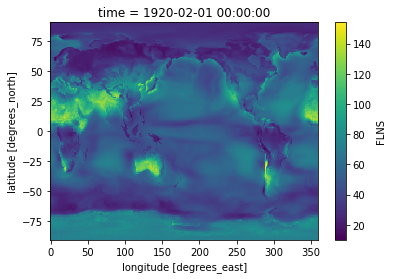

In [16]:
ds.FLNS.isel(time=0).mean('member_id').plot()